# COMP47590 - Advanced Machine Learning 

## DQN for Lunar Lander Using Callbacks & TensorBoard
Uses a Deep Q Network to train a neural network based player for the Lunar Lander environment from Gymnasium (https://gymnasium.farama.org/environments/box2d/lunar_lander/). This uses a vector-based state representation.

### Initialisation

If using Google colab you need to isntall packages  - comment out lines below.

In [1]:
#!apt install swig cmake ffmpeg
#!apt-get install -y xvfb x11-utils
#!python -m pip install 'git+https://github.com/DLR-RM/stable-baselines3@feat/gymnasium-support#egg=stable-baselines3[extra]' 
#!pip install pyglet box2d box2d-kengz
#!pip install pyvirtualdisplay PyOpenGL PyOpenGL-accelerate

For Google colab comment out this cell to make a virtual rendering canvas so render calls work (we still wont; see display!)

In [2]:
#import pyvirtualdisplay
#
#_display = pyvirtualdisplay.Display(visible=False,  # use False with Xvfb
#                                    size=(1400, 900))
#_ = _display.start()

### Import Packages

Import required packages. 

In [3]:
import gymnasium as gym
import stable_baselines3 as sb3

import pandas as pd # For data frames and data frame manipulation
pd.set_option('display.max_rows', 100)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)
import numpy as np # For general  numeric operations

import matplotlib.pyplot as plt
%matplotlib inline 

2025-03-27 22:03:40.017557: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


### Create the Environment

Create the Lunar Lander Environment with a TimeLimit wrapper

In [4]:
env_train = gym.make('LunarLander-v2')
env_train = gym.wrappers.TimeLimit(env_train, 
                                   max_episode_steps=3000)

### Create and Train an Agent With an Evaluation Callback

Create a simple DQN agent using stable-baselines3. LunarLander uses a state vector representation so a simple MLP can drive this model.

In [5]:
agent = sb3.DQN('MlpPolicy', 
                env_train, 
                verbose=1)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Create an evaluation callback so that an evaluation is performed every 5000 time steps

In [6]:
eval_env = gym.make('LunarLander-v2', render_mode = 'human') # We use a separate evaluation env in case any wrappers have been used
eval_callback = sb3.common.callbacks.EvalCallback(eval_env, 
                                                  best_model_save_path='./logs_lunarlander/',
                                                  log_path='./logs_lunarlander/', 
                                                  eval_freq=100,
                                                  render=True)

Train the agent with the callback

In [7]:
agent.learn(total_timesteps=500, 
            callback=eval_callback)

/Users/bmacnamee/opt/anaconda3/envs/COMP47590_2024/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(
2025-03-27 22:03:57.786 python3.12[7164:231649] +[IMKClient subclass]: chose IMKClient_Modern
2025-03-27 22:03:57.786 python3.12[7164:231649] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Eval num_timesteps=100, episode_reward=-949.59 +/- 252.08
Episode length: 144.60 +/- 42.38
----------------------------------
| eval/               |          |
|    mean_ep_length   | 145      |
|    mean_reward      | -950     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 100      |
----------------------------------
New best mean reward!
Eval num_timesteps=200, episode_reward=-1093.71 +/- 96.54
Episode length: 162.80 +/- 23.82
-----------------------------------
| eval/               |           |
|    mean_ep_length   | 163       |
|    mean_reward      | -1.09e+03 |
| rollout/            |           |
|    exploration_rate | 0.05      |
| time/               |           |
|    total_timesteps  | 200       |
| train/              |           |
|    learning_rate    | 0.0001    |
|    loss             | 1.16      |
|    n_updates        | 24        |
-----------------------------------
Eval num_time

### Evaluation

Evaluate the agent in the environment

In [8]:
mean_reward, std_reward = sb3.common.evaluation.evaluate_policy(agent, 
                                                                agent.get_env(), 
                                                                n_eval_episodes=10,
                                                               render = True)
print("Mean Reward: {} +/- {}".format(mean_reward, std_reward))

/Users/bmacnamee/opt/anaconda3/envs/COMP47590_2024/lib/python3.12/site-packages/stable_baselines3/common/vec_env/base_vec_env.py:243: UserWarning: You tried to call render() but no `render_mode` was passed to the env constructor.
  warnings.warn("You tried to call render() but no `render_mode` was passed to the env constructor.")


Mean Reward: -688.7739686 +/- 90.26195957897468


### Examine EvalCallback Logs

The EvalCallback saves evaluation information as a numpy array which we can load for analysis.

In [9]:
evaluation_log = np.load('./logs_lunarlander/evaluations.npz')

Results are stored as a series of *files*

In [10]:
evaluation_log.files

['timesteps', 'results', 'ep_lengths']

We can view each of these - note the multidimensional structure of results and ep_lengths.

In [11]:
evaluation_log['timesteps']

array([100, 200, 300, 400, 500])

In [12]:
evaluation_log['results']

array([[-1178.73304637, -1147.16844976,  -754.50844455, -1117.76109145,
         -549.78781202],
       [-1148.24115335, -1010.68573546, -1245.00699577,  -976.1866165 ,
        -1088.44205707],
       [ -714.63214807, -1052.67549746,  -961.07078769,  -873.74235133,
         -915.45021689],
       [ -755.8810806 ,  -695.56230264,  -597.06297755,  -636.59479553,
         -739.45879098],
       [ -681.68188085, -1175.11330764,  -554.25789191,  -669.35110384,
         -795.32795338]])

In [13]:
evaluation_log['ep_lengths']

array([[202, 167,  99, 163,  92],
       [190, 128, 182, 172, 142],
       [106, 190, 176, 182, 119],
       [103, 126,  79,  78,  89],
       [ 96, 116, 101, 106, 111]])

We can convert this into a pandas dataframe for easy analysis, plotting etc.

In [14]:
evaluation_log_df = pd.DataFrame({item: [np.mean(ep) for ep in evaluation_log[item]] for item in evaluation_log.files})
display(evaluation_log_df)

,timesteps,results,ep_lengths
0,100.0,-949.591769,144.6
1,200.0,-1093.712512,162.8
2,300.0,-903.514200,154.6
3,400.0,-684.911989,95.0
4,500.0,-775.146428,106.0


/var/folders/bz/lbfg_nj54wd40pqchhwx6ys80000gp/T/ipykernel_7164/3682008506.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(evaluation_log_df['timesteps'])


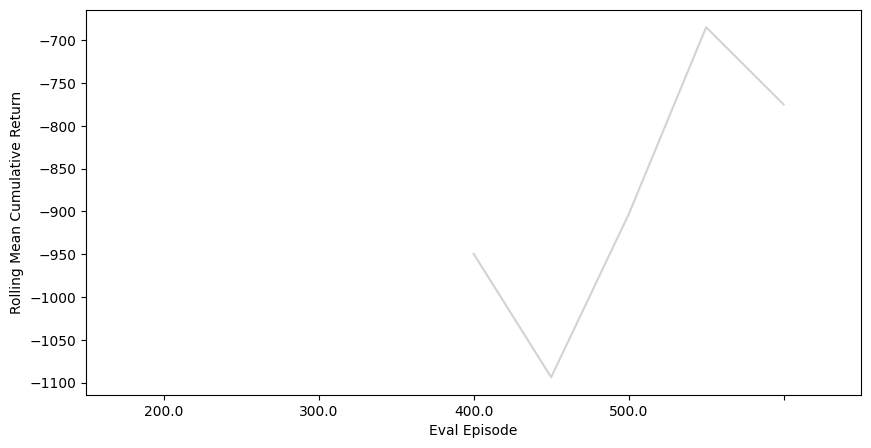

In [15]:
ax = evaluation_log_df.loc[0:len(evaluation_log_df), 'results'].plot(color = 'lightgray', xlim = [-5, len(evaluation_log_df)], figsize = (10,5))
evaluation_log_df['results'].rolling(5).mean().plot(color = 'black', xlim = [-5, len(evaluation_log_df)])
ax.set_xticklabels(evaluation_log_df['timesteps'])
ax.set_xlabel("Eval Episode")
plt.ylabel("Rolling Mean Cumulative Return")
plt.show()

We can also load the best model saved.

In [16]:
best_agent = sb3.dqn.DQN.load("./logs_lunarlander/best_model")

Evaluate the agent in the environment

In [17]:
mean_reward, std_reward = sb3.common.evaluation.evaluate_policy(best_agent, 
                                                                eval_env, 
                                                                n_eval_episodes=10,
                                                               render = True)
print("Mean Reward: {} +/- {}".format(mean_reward, std_reward))

/Users/bmacnamee/opt/anaconda3/envs/COMP47590_2024/lib/python3.12/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Mean Reward: -655.9170818346553 +/- 111.02318047279253


### Using TensorBoard

We can use **TensorBoard** to monitor the learning process in real time and historically. Simply set up a log location when we create the DQN agent. 

In [18]:
tb_log = './log_tb_lunarlander/'
agent = sb3.DQN('MlpPolicy', 
                env_train, 
                verbose=1, 
                tensorboard_log=tb_log)

Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


Make another evaluation callback with a much longer wait between steps and no rendering. 

In [19]:
eval_env = gym.make('LunarLander-v2', render_mode = 'human') # We use a separate evaluation env in case any wrappers have been used
eval_callback = sb3.common.callbacks.EvalCallback(eval_env, 
                                                  best_model_save_path='./logs_lunarlander/',
                                                  log_path='./logs_lunarlander/', 
                                                  eval_freq=5000,
                                                  render=False)

Train the model

In [ ]:
agent.learn(total_timesteps=1000000, 
            callback=eval_callback,
            tb_log_name="Basic DQN Network")

Logging to ./log_tb_lunarlander/Basic DQN Network_8
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 105      |
|    ep_rew_mean      | -167     |
|    exploration_rate | 0.996    |
| time/               |          |
|    episodes         | 4        |
|    fps              | 827      |
|    time_elapsed     | 0        |
|    total_timesteps  | 421      |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.32     |
|    n_updates        | 80       |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 99.8     |
|    ep_rew_mean      | -166     |
|    exploration_rate | 0.992    |
| time/               |          |
|    episodes         | 8        |
|    fps              | 729      |
|    time_elapsed     | 1        |
|    total_timesteps  | 798      |
| train/              |          |
|    learning_rate    | 0.0001   |
|  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 198      |
|    ep_rew_mean      | -251     |
|    exploration_rate | 0.359    |
| time/               |          |
|    episodes         | 624      |
|    fps              | 175      |
|    time_elapsed     | 384      |
|    total_timesteps  | 67457    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.705    |
|    n_updates        | 4364     |
----------------------------------
Eval num_timesteps=70000, episode_reward=-136.39 +/- 8.66
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -136     |
| rollout/            |          |
|    exploration_rate | 0.335    |
| time/               |          |
|    total_timesteps  | 70000    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.626    |

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 442      |
|    ep_rew_mean      | -155     |
|    exploration_rate | 0.0869   |
| time/               |          |
|    episodes         | 664      |
|    fps              | 99       |
|    time_elapsed     | 969      |
|    total_timesteps  | 96119    |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 3.81     |
|    n_updates        | 11529    |
----------------------------------
Eval num_timesteps=100000, episode_reward=-208.03 +/- 150.66
Episode length: 696.00 +/- 372.32
----------------------------------
| eval/               |          |
|    mean_ep_length   | 696      |
|    mean_reward      | -208     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 100000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.55  

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 720      |
|    ep_rew_mean      | -97.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 700      |
|    fps              | 78       |
|    time_elapsed     | 1655     |
|    total_timesteps  | 130595   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 1.87     |
|    n_updates        | 20148    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 749      |
|    ep_rew_mean      | -97.7    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 704      |
|    fps              | 81       |
|    time_elapsed     | 1660     |
|    total_timesteps  | 134595   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.434    |
|    n_updates      

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 907      |
|    ep_rew_mean      | -95.9    |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 736      |
|    fps              | 68       |
|    time_elapsed     | 2422     |
|    total_timesteps  | 166595   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.563    |
|    n_updates        | 29148    |
----------------------------------
Eval num_timesteps=170000, episode_reward=-151.81 +/- 29.29
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -152     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 170000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.489   

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 980      |
|    ep_rew_mean      | -107     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 772      |
|    fps              | 51       |
|    time_elapsed     | 3903     |
|    total_timesteps  | 202154   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.416    |
|    n_updates        | 38038    |
----------------------------------
Eval num_timesteps=205000, episode_reward=-167.11 +/- 11.54
Episode length: 1000.00 +/- 0.00
----------------------------------
| eval/               |          |
|    mean_ep_length   | 1e+03    |
|    mean_reward      | -167     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 205000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.345   

New best mean reward!
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 978      |
|    ep_rew_mean      | -115     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 808      |
|    fps              | 50       |
|    time_elapsed     | 4642     |
|    total_timesteps  | 236440   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 2.64     |
|    n_updates        | 46609    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 970      |
|    ep_rew_mean      | -114     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 812      |
|    fps              | 51       |
|    time_elapsed     | 4645     |
|    total_timesteps  | 239584   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.638    

Eval num_timesteps=270000, episode_reward=-113.13 +/- 176.68
Episode length: 871.40 +/- 128.13
----------------------------------
| eval/               |          |
|    mean_ep_length   | 871      |
|    mean_reward      | -113     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 270000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.506    |
|    n_updates        | 54999    |
----------------------------------
----------------------------------
| rollout/            |          |
|    ep_len_mean      | 934      |
|    ep_rew_mean      | -114     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 848      |
|    fps              | 50       |
|    time_elapsed     | 5356     |
|    total_timesteps  | 271989   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.663 

----------------------------------
| rollout/            |          |
|    ep_len_mean      | 891      |
|    ep_rew_mean      | -106     |
|    exploration_rate | 0.05     |
| time/               |          |
|    episodes         | 884      |
|    fps              | 50       |
|    time_elapsed     | 5993     |
|    total_timesteps  | 302816   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.281    |
|    n_updates        | 63203    |
----------------------------------
Eval num_timesteps=305000, episode_reward=-173.15 +/- 59.44
Episode length: 769.20 +/- 174.62
----------------------------------
| eval/               |          |
|    mean_ep_length   | 769      |
|    mean_reward      | -173     |
| rollout/            |          |
|    exploration_rate | 0.05     |
| time/               |          |
|    total_timesteps  | 305000   |
| train/              |          |
|    learning_rate    | 0.0001   |
|    loss             | 0.327  

Then connect to the log using **TensorBoard** from the command line: 

`tensorboard --logdir ./log_tb_lunarlander/`

Then open TensorBoard in a browser, typically located at:

`http://localhost:6006/`

Examine the EvalCallback outputs.

In [ ]:
evaluation_log = np.load('./logs_lunarlander/evaluations.npz')
evaluation_log_df = pd.DataFrame({item: [np.mean(ep) for ep in evaluation_log[item]] for item in evaluation_log.files})
ax = evaluation_log_df.loc[0:len(evaluation_log_df), 'results'].plot(color = 'lightgray', xlim = [-5, len(evaluation_log_df)], figsize = (10,5))
evaluation_log_df['results'].rolling(5).mean().plot(color = 'black', xlim = [-5, len(evaluation_log_df)])
ax.set_xticklabels(evaluation_log_df['timesteps'])
ax.set_xlabel("Eval Episode")
plt.ylabel("Rolling Mean Cumulative Return")
plt.show()

We can also load the best model saved.

In [ ]:
best_agent = sb3.dqn.DQN.load("./logs_lunarlander/best_model")

Evaluate the agent in the environment

In [ ]:
mean_reward, std_reward = sb3.common.evaluation.evaluate_policy(best_agent, 
                                                                eval_env, 
                                                                n_eval_episodes=10,
                                                               render = True)
print("Mean Reward: {} +/- {}".format(mean_reward, std_reward))